In [347]:
import pandas as pd

df = pd.read_csv(
    # "GBPUSD=X.csv",
    "MSFT.csv",
    index_col='Date',
    parse_dates=['Date'],
)

df.tail()

<ipython-input-347-24cdcbf89072>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv(


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-28,236.889999,239.720001,234.169998,234.529999,233.433731,17457100
2022-12-29,235.649994,241.919998,235.649994,241.009995,239.883453,19770700
2022-12-30,238.210007,239.960007,236.660004,239.820007,238.699020,21938500
2023-03-01,243.080002,245.750000,237.399994,239.580002,238.460129,25740000
2023-04-01,232.279999,232.869995,225.960007,229.100006,228.029114,50623400


In [348]:
#set previous day close and previous day volume
df['Lag_open'] = df['Open'].shift(1)
df['Lag_high'] = df['High'].shift(1)
df['Lag_low'] = df['Low'].shift(1)
df['Lag_close'] = df['Close'].shift(1)
df['Lag_vol'] = df['Volume'].shift(1)
df = df.reindex(columns=['Lag_open', 'Lag_high', 'Lag_low', 'Lag_close', 'Lag_vol', 'Close'])
df.dropna(inplace=True)

df.head()

,Lag_open,Lag_high,Lag_low,Lag_close,Lag_vol,Close
Date,,,,,,
1986-03-14,0.088542,0.101563,0.088542,0.097222,1.031789e+09,0.100694
1986-03-17,0.097222,0.102431,0.097222,0.100694,3.081600e+08,0.102431
1986-03-18,0.100694,0.103299,0.100694,0.102431,1.331712e+08,0.099826
1986-03-19,0.102431,0.103299,0.098958,0.099826,6.776640e+07,0.098090
1986-03-20,0.099826,0.100694,0.097222,0.098090,4.789440e+07,0.095486


In [351]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Training data
y = df.loc[:, 'Close']  # target
X = df.drop('Close', axis=1)  # features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 77)
X_train.head()

,Lag_open,Lag_high,Lag_low,Lag_close,Lag_vol
Date,,,,,
2014-10-24,44.619999,45.450001,44.529999,45.020000,45451900.0
1990-08-11,0.885417,0.899306,0.881944,0.885417,63100800.0
2000-01-08,35.093750,35.562500,34.625000,34.906250,70283800.0
2010-06-05,29.770000,30.090000,29.690001,29.850000,66833800.0
2004-05-08,28.010000,28.200001,27.990000,28.059999,46217900.0


In [352]:
y_train.head()

Date
2014-10-24    46.130001
1990-08-11     0.881944
2000-01-08    34.343750
2010-06-05    28.980000
2004-05-08    27.530001
Name: Close, dtype: float64

In [353]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score=r2_score(y_test,y_pred)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is  0.9994613919908264
mean_sqrd_error is== 2.4659098523643195
root_mean_squared error of is== 1.5703215760997233


In [354]:
print(X_test)

              Lag_open    Lag_high     Lag_low   Lag_close      Lag_vol
Date                                                                   
2019-06-20  135.000000  135.929993  133.809998  135.690002   23744400.0
2004-03-17   25.260000   25.370001   25.100000   25.180000   65453800.0
1994-03-24    2.664063    2.734375    2.656250    2.695313  116441600.0
2002-03-12   29.325001   29.480000   28.504999   28.844999   63735000.0
1989-01-20    0.362847    0.373264    0.362847    0.371528   84297600.0
...                ...         ...         ...         ...          ...
2010-03-05   31.070000   31.080000   30.520000   30.540001   63214800.0
2000-06-14   33.375000   34.000000   33.062500   33.937500   44289200.0
2015-03-20   42.259998   42.590000   42.220001   42.290001   33879100.0
1998-03-18   20.421875   20.421875   19.921875   20.093750   53842400.0
2020-02-21  186.949997  187.250000  181.100006  184.419998   36862400.0

[3062 rows x 5 columns]


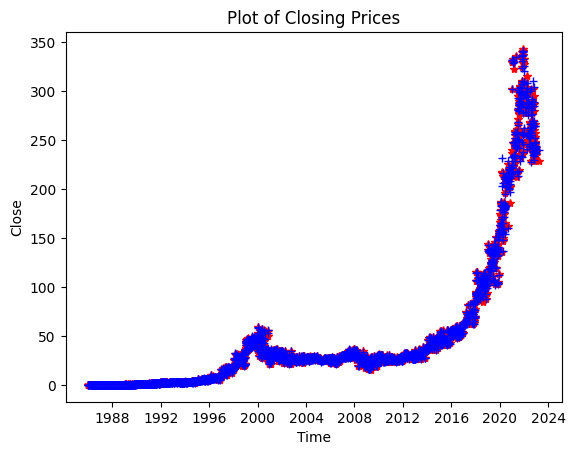

In [355]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
ax.plot(X_test.index, y_test, '*', color='red')
ax.plot(X_test.index, y_pred, '+', color='blue')
# ax.set_ylim(1.1,1.3)
ax.set_ylabel('Close')
ax.set_xlabel('Time')
ax.set_title('Plot of Closing Prices');

In [357]:
df2 = pd.read_csv(
    # "MSFT2.csv",
    "MSFT2.csv",
    index_col='Date',
    parse_dates=['Date'],
)

#set previous day close and previous day volume
df2['Lag_open'] = df2['Open'].shift(1)
df2['Lag_high'] = df2['High'].shift(1)
df2['Lag_low'] = df2['Low'].shift(1)
df2['Lag_close'] = df2['Close'].shift(1)
df2['Lag_vol'] = df2['Volume'].shift(1)
df2 = df2.reindex(columns=['Lag_open', 'Lag_high', 'Lag_low', 'Lag_close', 'Lag_vol', 'Close'])
df2.dropna(inplace=True)

df2.head()

<ipython-input-357-329eb1fa2385>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2 = pd.read_csv(


,Lag_open,Lag_high,Lag_low,Lag_close,Lag_vol,Close
Date,,,,,,
2023-06-01,227.199997,227.550003,221.759995,222.309998,39585600.0,224.929993
2023-09-01,223.000000,225.759995,219.350006,224.929993,43613600.0,227.119995
2023-10-01,226.449997,231.240005,226.410004,227.119995,27369800.0,228.850006
2023-11-01,227.759995,231.309998,227.330002,228.850006,27033900.0,235.770004
2023-12-01,231.289993,235.949997,231.110001,235.770004,28669300.0,238.509995


In [358]:
X_test2 = df2.drop('Close', axis=1)
y_actual = df2.loc[:, 'Close']

y_pred2 = model.predict(X_test2)
score2=r2_score(y_actual,y_pred2)
print('r2 score is ',score2)
print('mean_sqrd_error is==',mean_squared_error(y_actual,y_pred2))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_actual,y_pred2)))

r2 score is  0.9671468571790007
mean_sqrd_error is== 23.83660544032105
root_mean_squared error of is== 4.882274617462751


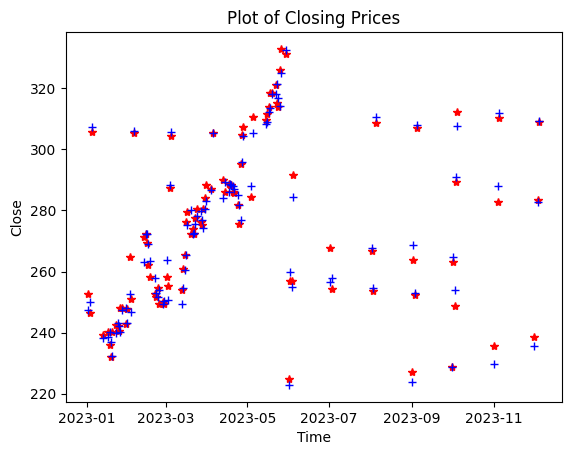

In [359]:
fig2, ax2 = plt.subplots()
ax2.plot(X_test2.index, y_actual, '*', color='red')
ax2.plot(X_test2.index, y_pred2, '+', color='blue')
ax2.set_ylabel('Close')
ax2.set_xlabel('Time')
ax2.set_title('Plot of Closing Prices');

In [371]:
print(X_test2)

              Lag_open    Lag_high     Lag_low   Lag_close     Lag_vol
Date                                                                  
2023-06-01  227.199997  227.550003  221.759995  222.309998  39585600.0
2023-09-01  223.000000  225.759995  219.350006  224.929993  43613600.0
2023-10-01  226.449997  231.240005  226.410004  227.119995  27369800.0
2023-11-01  227.759995  231.309998  227.330002  228.850006  27033900.0
2023-12-01  231.289993  235.949997  231.110001  235.770004  28669300.0
...                ...         ...         ...         ...         ...
2023-05-23  318.600006  322.589996  318.010010  321.179993  24115700.0
2023-05-24  320.029999  322.720001  315.250000  315.260010  30797200.0
2023-05-25  314.730011  316.500000  312.609985  313.850006  23384900.0
2023-05-26  323.239990  326.899994  320.000000  325.920013  43301700.0
2023-05-30  324.019989  333.399994  323.880005  332.890015  36600900.0

[99 rows x 5 columns]


In [376]:
data = [['2023-05-30', 335.230011,335.73999,330.519989,331.209991,29472500]]
today = pd.DataFrame(data, columns=['Date', 'Lag_open', 'Lag_high', 'Lag_low', 'Lag_close', 'Lag_vol'])
today['Date'] = pd.to_datetime(today['Date'])
today = today.set_index('Date')
today

,Lag_open,Lag_high,Lag_low,Lag_close,Lag_vol
Date,,,,,
2023-05-30,335.230011,335.73999,330.519989,331.209991,29472500


In [378]:
y_pred3 = model.predict(today)
print(y_pred3)

[331.61900063]
